In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.metrics import confusion_matrix

**Importing the dataset**

In [32]:
df=pd.read_csv('Social_Network_Ads.csv')

In [33]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [34]:
del df['User ID']
df['Gender']=df['Gender'].map({'Male':1,"Female":0})

In [35]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [36]:
x = df[['Gender', 'Age','EstimatedSalary']].values 
y = df['Purchased'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3) 

**Feature Scaling**

In [37]:
scaler = StandardScaler() 
scaler.fit(x_train) 
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

**Fitting Decision Tree Classification to the Training set**

In [38]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train) 

DecisionTreeClassifier()

**Predicting the Test set results**

In [39]:
y_pred = dt.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

**Making the Confusion Matrix**

Test set accuracy: 0.86
Test set auc: 0.85


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


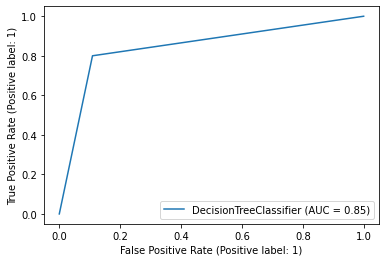

In [40]:
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(dt, x_test, y_test)

In [41]:
k1=pd.DataFrame(y_test,columns=['Y_test'])
k2=pd.DataFrame(y_pred,columns=['Y_pred'])
final=pd.concat((k1,k2),axis=1)
final

,Y_test,Y_pred
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
...,...,...
75,0,0
76,0,0
77,0,0
78,0,0


In [42]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[49,  6],
       [ 5, 20]])

Text(42.0, 0.5, 'True')

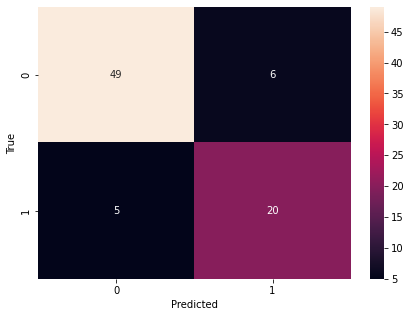

In [43]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

**Visualising the Training set results**

In [44]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [45]:
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

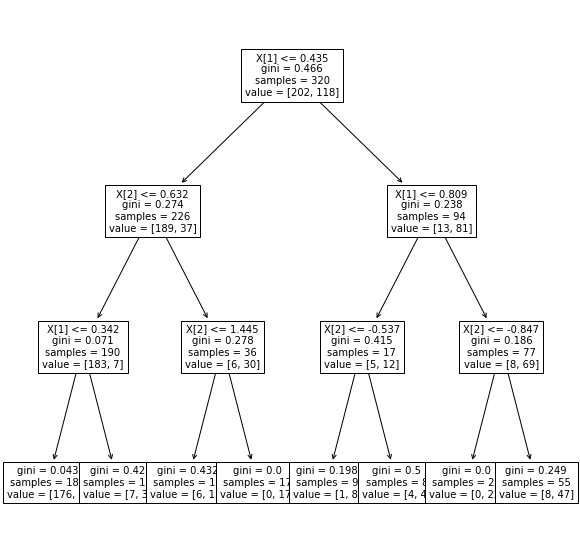

In [46]:
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf_tree, fontsize=10)
plt.show()

**Visualising the Test set results**

[Text(0.42777777777777776, 0.9642857142857143, 'X[1] <= 0.435\ngini = 0.466\nsamples = 320\nvalue = [202, 118]'),
 Text(0.23333333333333334, 0.8928571428571429, 'X[2] <= 0.632\ngini = 0.274\nsamples = 226\nvalue = [189, 37]'),
 Text(0.13333333333333333, 0.8214285714285714, 'X[1] <= 0.342\ngini = 0.071\nsamples = 190\nvalue = [183, 7]'),
 Text(0.08888888888888889, 0.75, 'X[1] <= -0.126\ngini = 0.043\nsamples = 180\nvalue = [176, 4]'),
 Text(0.06666666666666667, 0.6785714285714286, 'gini = 0.0\nsamples = 127\nvalue = [127, 0]'),
 Text(0.1111111111111111, 0.6785714285714286, 'X[2] <= -0.078\ngini = 0.14\nsamples = 53\nvalue = [49, 4]'),
 Text(0.08888888888888889, 0.6071428571428571, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.13333333333333333, 0.6071428571428571, 'X[2] <= 0.011\ngini = 0.252\nsamples = 27\nvalue = [23, 4]'),
 Text(0.1111111111111111, 0.5357142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.15555555555555556, 0.5357142857142857, 'X[1] <= 0.248\ngi

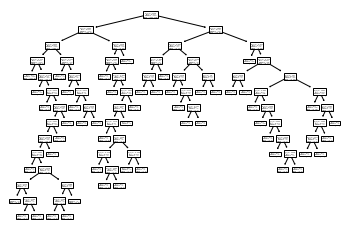

In [47]:
from sklearn import tree
tree.plot_tree(dt)